In [26]:
import pandas as pd
image_root = '../AMD_processed/'
dataset_path = '../主诉/saved-OCT图像-疾病-体征-主诉'
train_data = pd.read_csv(f'{dataset_path}/train_label.csv')
test_data = pd.read_csv(f'{dataset_path}/test_label.csv')

In [27]:
train_data.head(3)

,url,disease,视网膜内液性暗腔,视网膜下积液,RPE脱离,RPE下高反射病灶,视网膜内或视网膜下高反射病灶,尖锐的RPED峰,双层征,多发性RPED,RPED切迹,视网膜内高反射硬性渗出,patient_id,eye_pos,complaints,prescribe_time
0,03055892/OCT/OPt.1.3.6.1.4.1.33437.10.4.410100...,CNV,0,0,0,0,1,0,0,0,0,0,史群英,右眼,右眼视物不清，眼前黑影遮挡10天。,2020-06-10
1,02968315/OCT/OPt.1.3.6.1.4.1.33437.10.4.410100...,CNV,0,0,1,0,1,0,0,0,0,1,刘玉生,左眼,双眼视物不清1年。,2020-02-24
2,02968315/OCT/OPt.1.3.6.1.4.1.33437.10.4.410100...,CNV,1,0,0,0,1,0,0,0,0,1,刘玉生,左眼,左眼玻璃体腔注药术后1个月，要求再次注药。,2020-06-10


In [28]:
label = 'disease'
image_col = 'url'

In [29]:
from os.path import join
train_data[image_col] = train_data[image_col].apply(lambda x : image_root + x)
test_data[image_col] = test_data[image_col].apply(lambda x : image_root + x)

In [30]:
train_data.head(3)

,url,disease,视网膜内液性暗腔,视网膜下积液,RPE脱离,RPE下高反射病灶,视网膜内或视网膜下高反射病灶,尖锐的RPED峰,双层征,多发性RPED,RPED切迹,视网膜内高反射硬性渗出,patient_id,eye_pos,complaints,prescribe_time
0,../AMD_processed/03055892/OCT/OPt.1.3.6.1.4.1....,CNV,0,0,0,0,1,0,0,0,0,0,史群英,右眼,右眼视物不清，眼前黑影遮挡10天。,2020-06-10
1,../AMD_processed/02968315/OCT/OPt.1.3.6.1.4.1....,CNV,0,0,1,0,1,0,0,0,0,1,刘玉生,左眼,双眼视物不清1年。,2020-02-24
2,../AMD_processed/02968315/OCT/OPt.1.3.6.1.4.1....,CNV,1,0,0,0,1,0,0,0,0,1,刘玉生,左眼,左眼玻璃体腔注药术后1个月，要求再次注药。,2020-06-10


In [31]:
example_row = train_data.iloc[1]

example_row

url               ../AMD_processed/02968315/OCT/OPt.1.3.6.1.4.1....
disease                                                         CNV
视网膜内液性暗腔                                                          0
视网膜下积液                                                            0
RPE脱离                                                             1
RPE下高反射病灶                                                         0
视网膜内或视网膜下高反射病灶                                                    1
尖锐的RPED峰                                                          0
双层征                                                               0
多发性RPED                                                           0
RPED切迹                                                            0
视网膜内高反射硬性渗出                                                       1
patient_id                                                      刘玉生
eye_pos                                                          左眼
complaints                                      

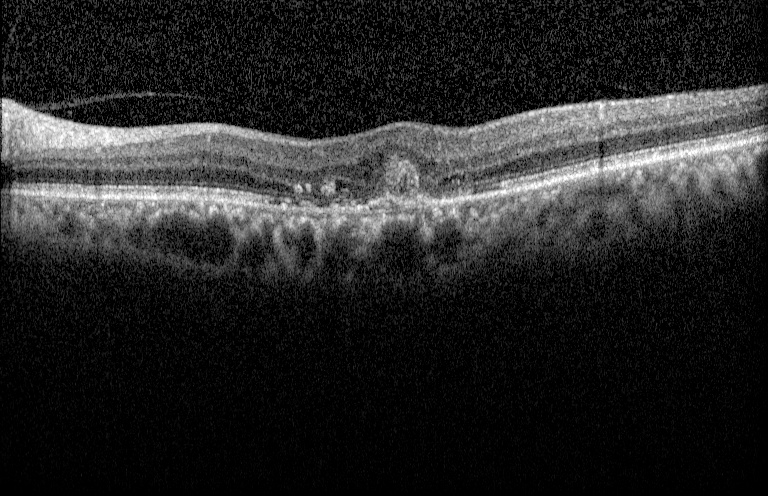

In [32]:
example_image = example_row[image_col]

from IPython.display import Image, display
pil_img = Image(filename=example_image)
display(pil_img)

In [33]:
from autogluon.tabular import FeatureMetadata
feature_metadata = FeatureMetadata.from_df(train_data)

print(feature_metadata)

('int', [])                        : 10 | ['视网膜内液性暗腔', '视网膜下积液', 'RPE脱离', 'RPE下高反射病灶', '视网膜内或视网膜下高反射病灶', ...]
('object', [])                     :  5 | ['url', 'disease', 'patient_id', 'eye_pos', 'complaints']
('object', ['datetime_as_object']) :  1 | ['prescribe_time']


In [34]:
feature_metadata = feature_metadata.add_special_types({image_col: ['image_path']})

print(feature_metadata)

('int', [])                        : 10 | ['视网膜内液性暗腔', '视网膜下积液', 'RPE脱离', 'RPE下高反射病灶', '视网膜内或视网膜下高反射病灶', ...]
('object', [])                     :  4 | ['disease', 'patient_id', 'eye_pos', 'complaints']
('object', ['datetime_as_object']) :  1 | ['prescribe_time']
('object', ['image_path'])         :  1 | ['url']


In [35]:
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
hyperparameters = get_hyperparameter_config('multimodal')

hyperparameters

{'NN_TORCH': {},
 'GBM': [{},
  {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  'GBMLarge'],
 'CAT': {},
 'XGB': {},
 'AG_TEXT_NN': {'presets': 'medium_quality_faster_train'},
 'AG_IMAGE_NN': {},
 'VW': {}}

In [37]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label=label).fit(
    train_data=train_data,
    hyperparameters=hyperparameters,
    feature_metadata=feature_metadata,
    time_limit=900,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220330_084709\"
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20220330_084709\"
AutoGluon Version:  0.4.0
Python Version:     3.8.10
Operating System:   Windows
Train Data Rows:    2576
Train Data Columns: 15
Label Column: disease
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	3 unique label values:  ['CNV', 'PCV', 'Non-wet-AMD']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    584.83 MB
	Train Data (Original)  Memory Usage: 1.9 MB (0.3% of available memory)
	Stage 1 Generators:
		Fi

In [40]:
from autogluon.vision.predictor.predictor import _get_supported_models
_get_supported_models()  # there're more, we just show a few

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_x